In [1]:
import pandas as pd
import zipfile
from matplotlib import pyplot as plt
import os

In [2]:
with zipfile.ZipFile('189687_423331_compressed_companies_sorted.csv.zip') as z:
    with z.open('companies_sorted.csv') as f:
        data = pd.read_csv(f)
        print(data.head())

   Unnamed: 0                       name         domain  year founded  \
0     5872184                        ibm        ibm.com        1911.0   
1     4425416  tata consultancy services        tcs.com        1968.0   
2       21074                  accenture  accenture.com        1989.0   
3     2309813                    us army     goarmy.com        1800.0   
4     1558607                         ey         ey.com        1989.0   

                              industry size range  \
0  information technology and services     10001+   
1  information technology and services     10001+   
2  information technology and services     10001+   
3                             military     10001+   
4                           accounting     10001+   

                                 locality         country  \
0       new york, new york, united states   united states   
1              bombay, maharashtra, india           india   
2                 dublin, dublin, ireland         ireland  

In [45]:
'''upper = data['year founded']<1961
lower = data['year founded']>1800
usa = data_adjusted['country']=='united states'
china = data_adjusted['country']=='china''''

In [155]:
data_p1960 = data[upper&lower]
data_year = data_p1960.groupby('year founded').count()
#most popular countries pre 1960
(data_p1960['country'].value_counts()/len(data_p1960['country'])).head(15)

united states     0.455519
united kingdom    0.060933
netherlands       0.040287
canada            0.040077
italy             0.030543
france            0.026586
germany           0.022923
spain             0.021810
australia         0.017383
brazil            0.013312
switzerland       0.013096
belgium           0.012880
sweden            0.011201
denmark           0.010450
india             0.008288
Name: country, dtype: float64

In [70]:
usa_data_year = data_adjusted[usa].groupby('year founded').count()

In [6]:
yearly_companies = data.groupby('year founded').count()

In [69]:
lower_60 = data['year founded']>1960
upper_18 = data['year founded']<2018
data_1960 = data[lower_50&upper_18]
#most popular countries post 1960
(data_1960['country'].value_counts()/len(data_1960['country'])).head(15)

united states     0.300558
united kingdom    0.064749
canada            0.036381
netherlands       0.030558
india             0.028529
spain             0.025514
france            0.023630
brazil            0.023570
italy             0.021182
australia         0.019103
germany           0.012464
turkey            0.008856
belgium           0.008142
sweden            0.007975
mexico            0.007861
Name: country, dtype: float64

out of the top 15 in the pre 1960 list, only 5 increased in % while 10 dropped in %. This was led by the United States, which went down 15% in the timespan.

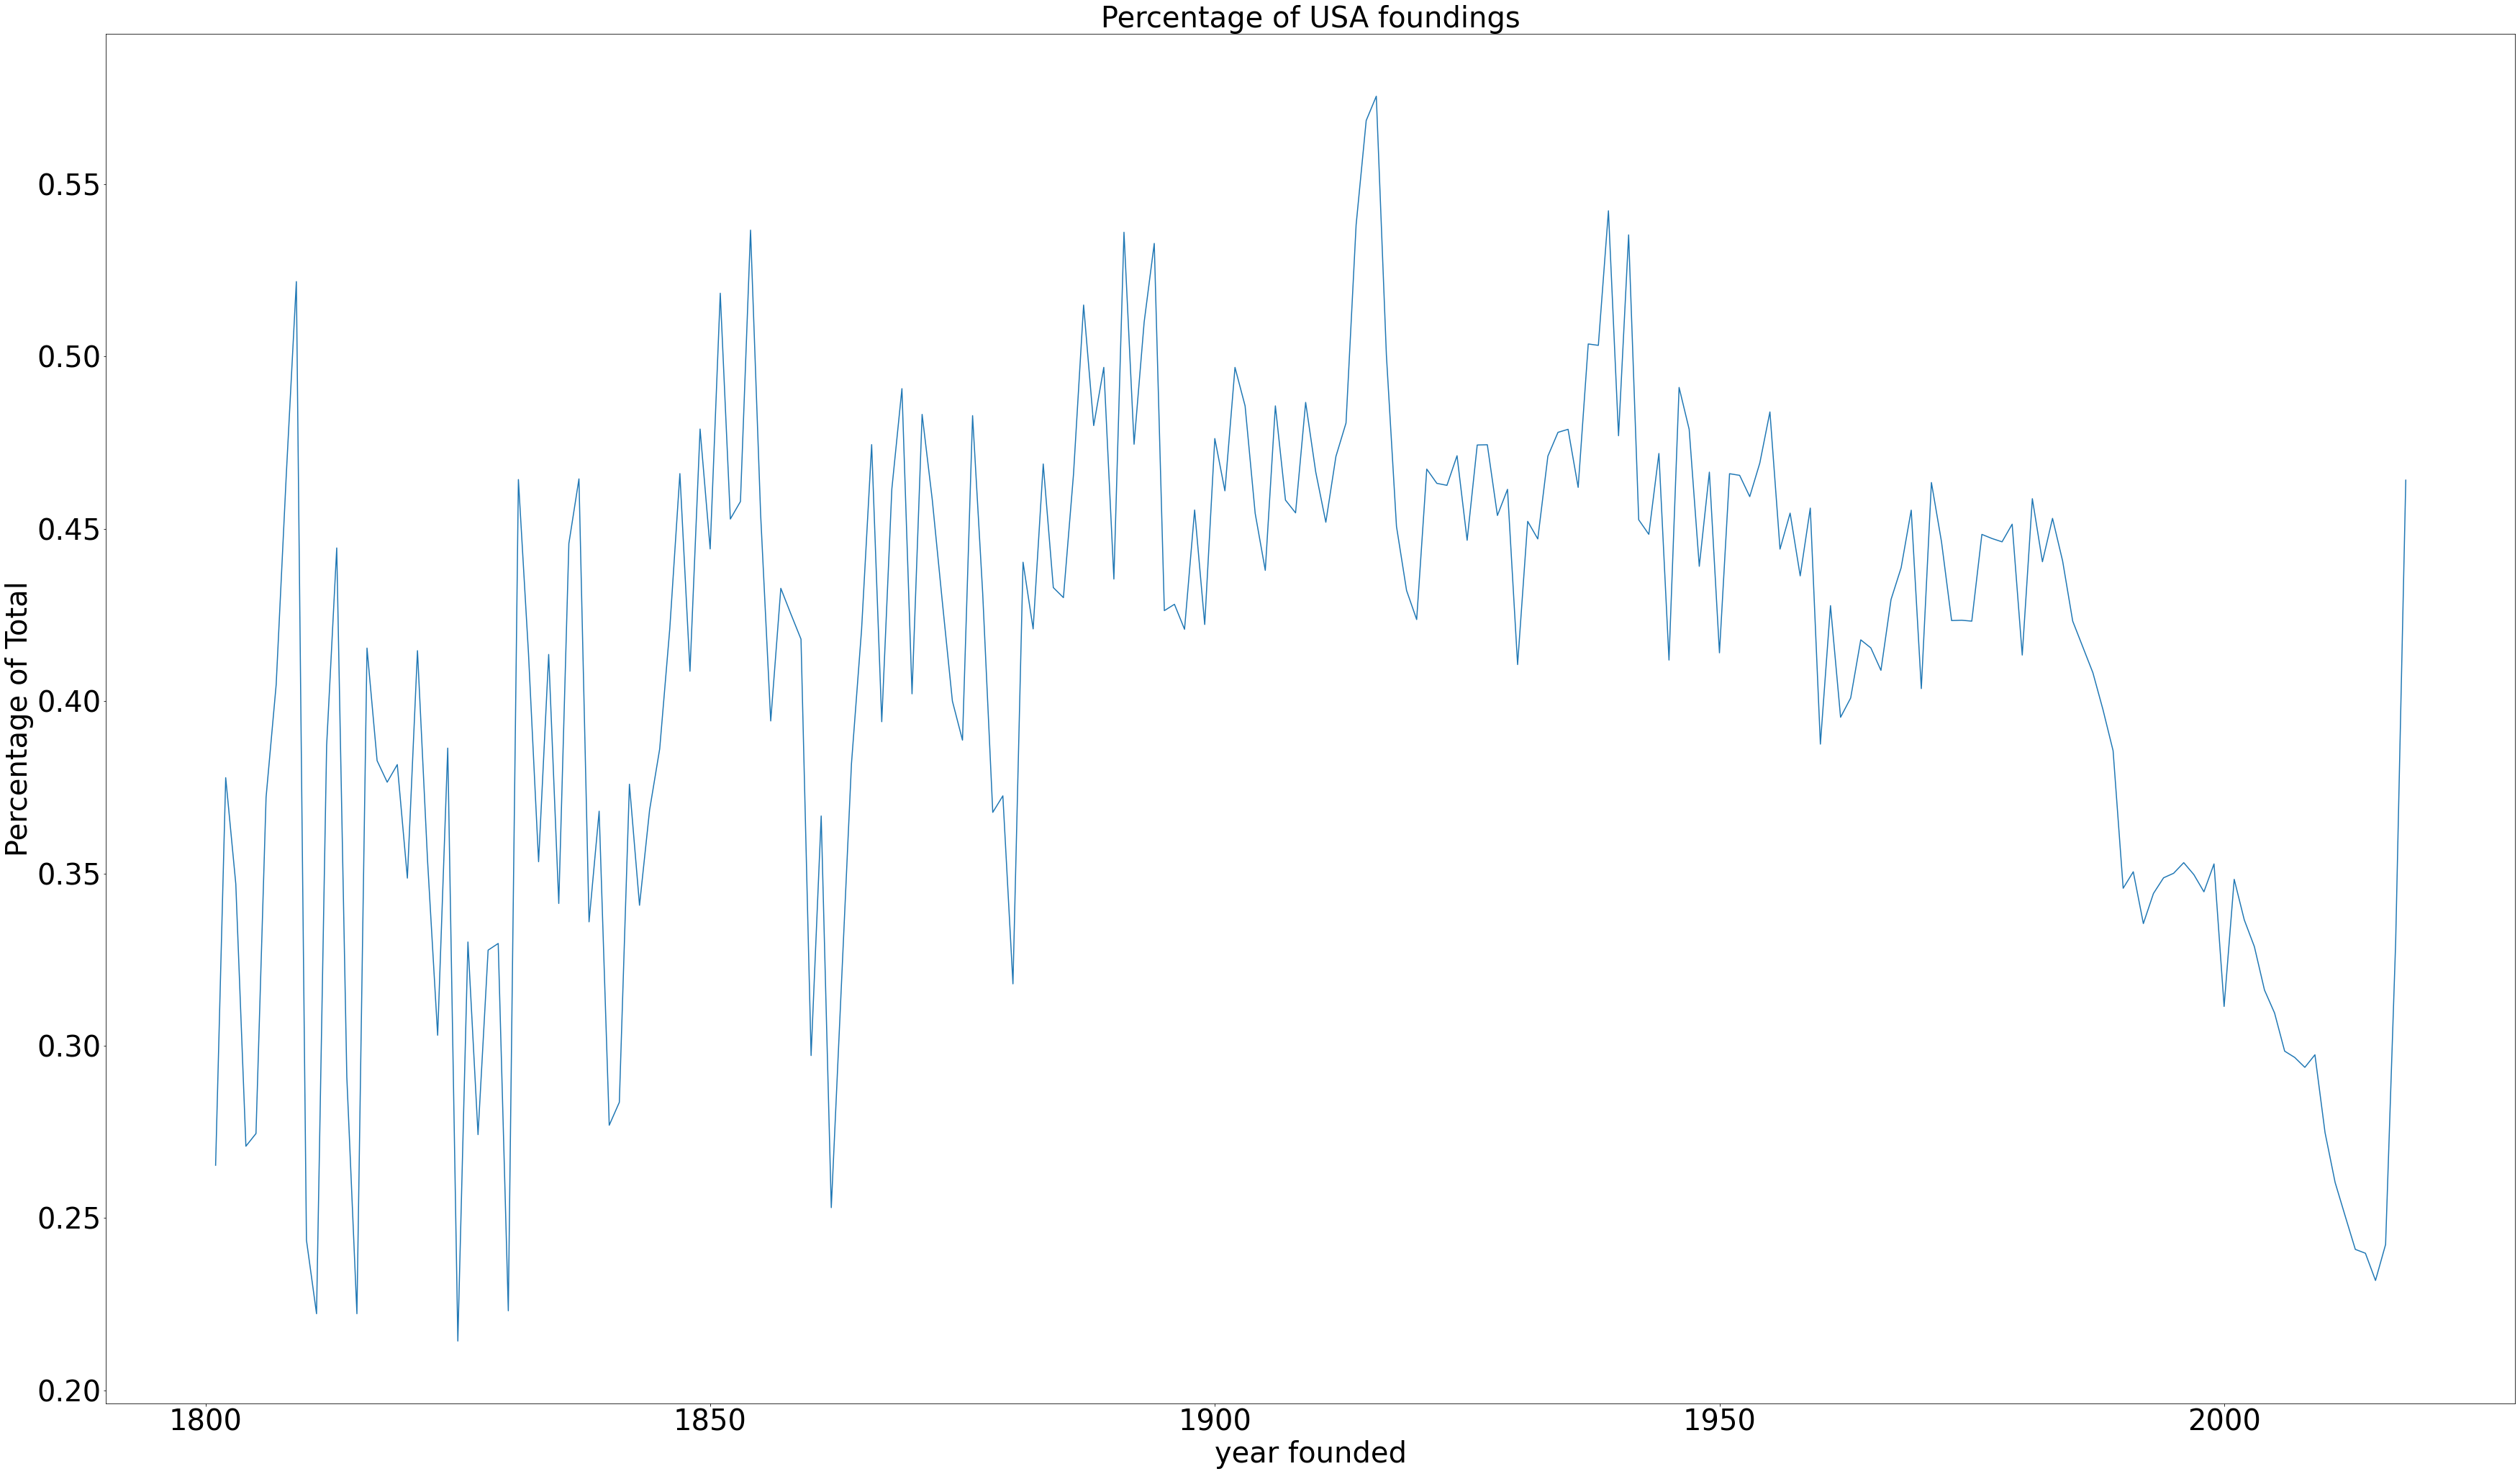

In [7]:
#percentage of USA companies over time
fig = plt.figure(figsize=(60,35)) 
plt.xlabel('Year Founded',fontsize=40)
plt.ylabel('Percentage of Total',fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Percentage of USA foundings',fontsize=40)


_=(usa_data_year['name']/yearly_companies['name']).plot()
os.chdir('images')
plt.savefig('usa foundings.png')

In [48]:
data_p1960['country'].value_counts().head(10)

united states     71618
united kingdom     9580
netherlands        6334
canada             6301
italy              4802
france             4180
germany            3604
spain              3429
australia          2733
brazil             2093
Name: country, dtype: int64

In [147]:
adj_l = data['year founded']>1900
adj_u = data['year founded']<2018
data_adj = data[adj_l&adj_u]
yearly_companies = data_adj.groupby('year founded').count()

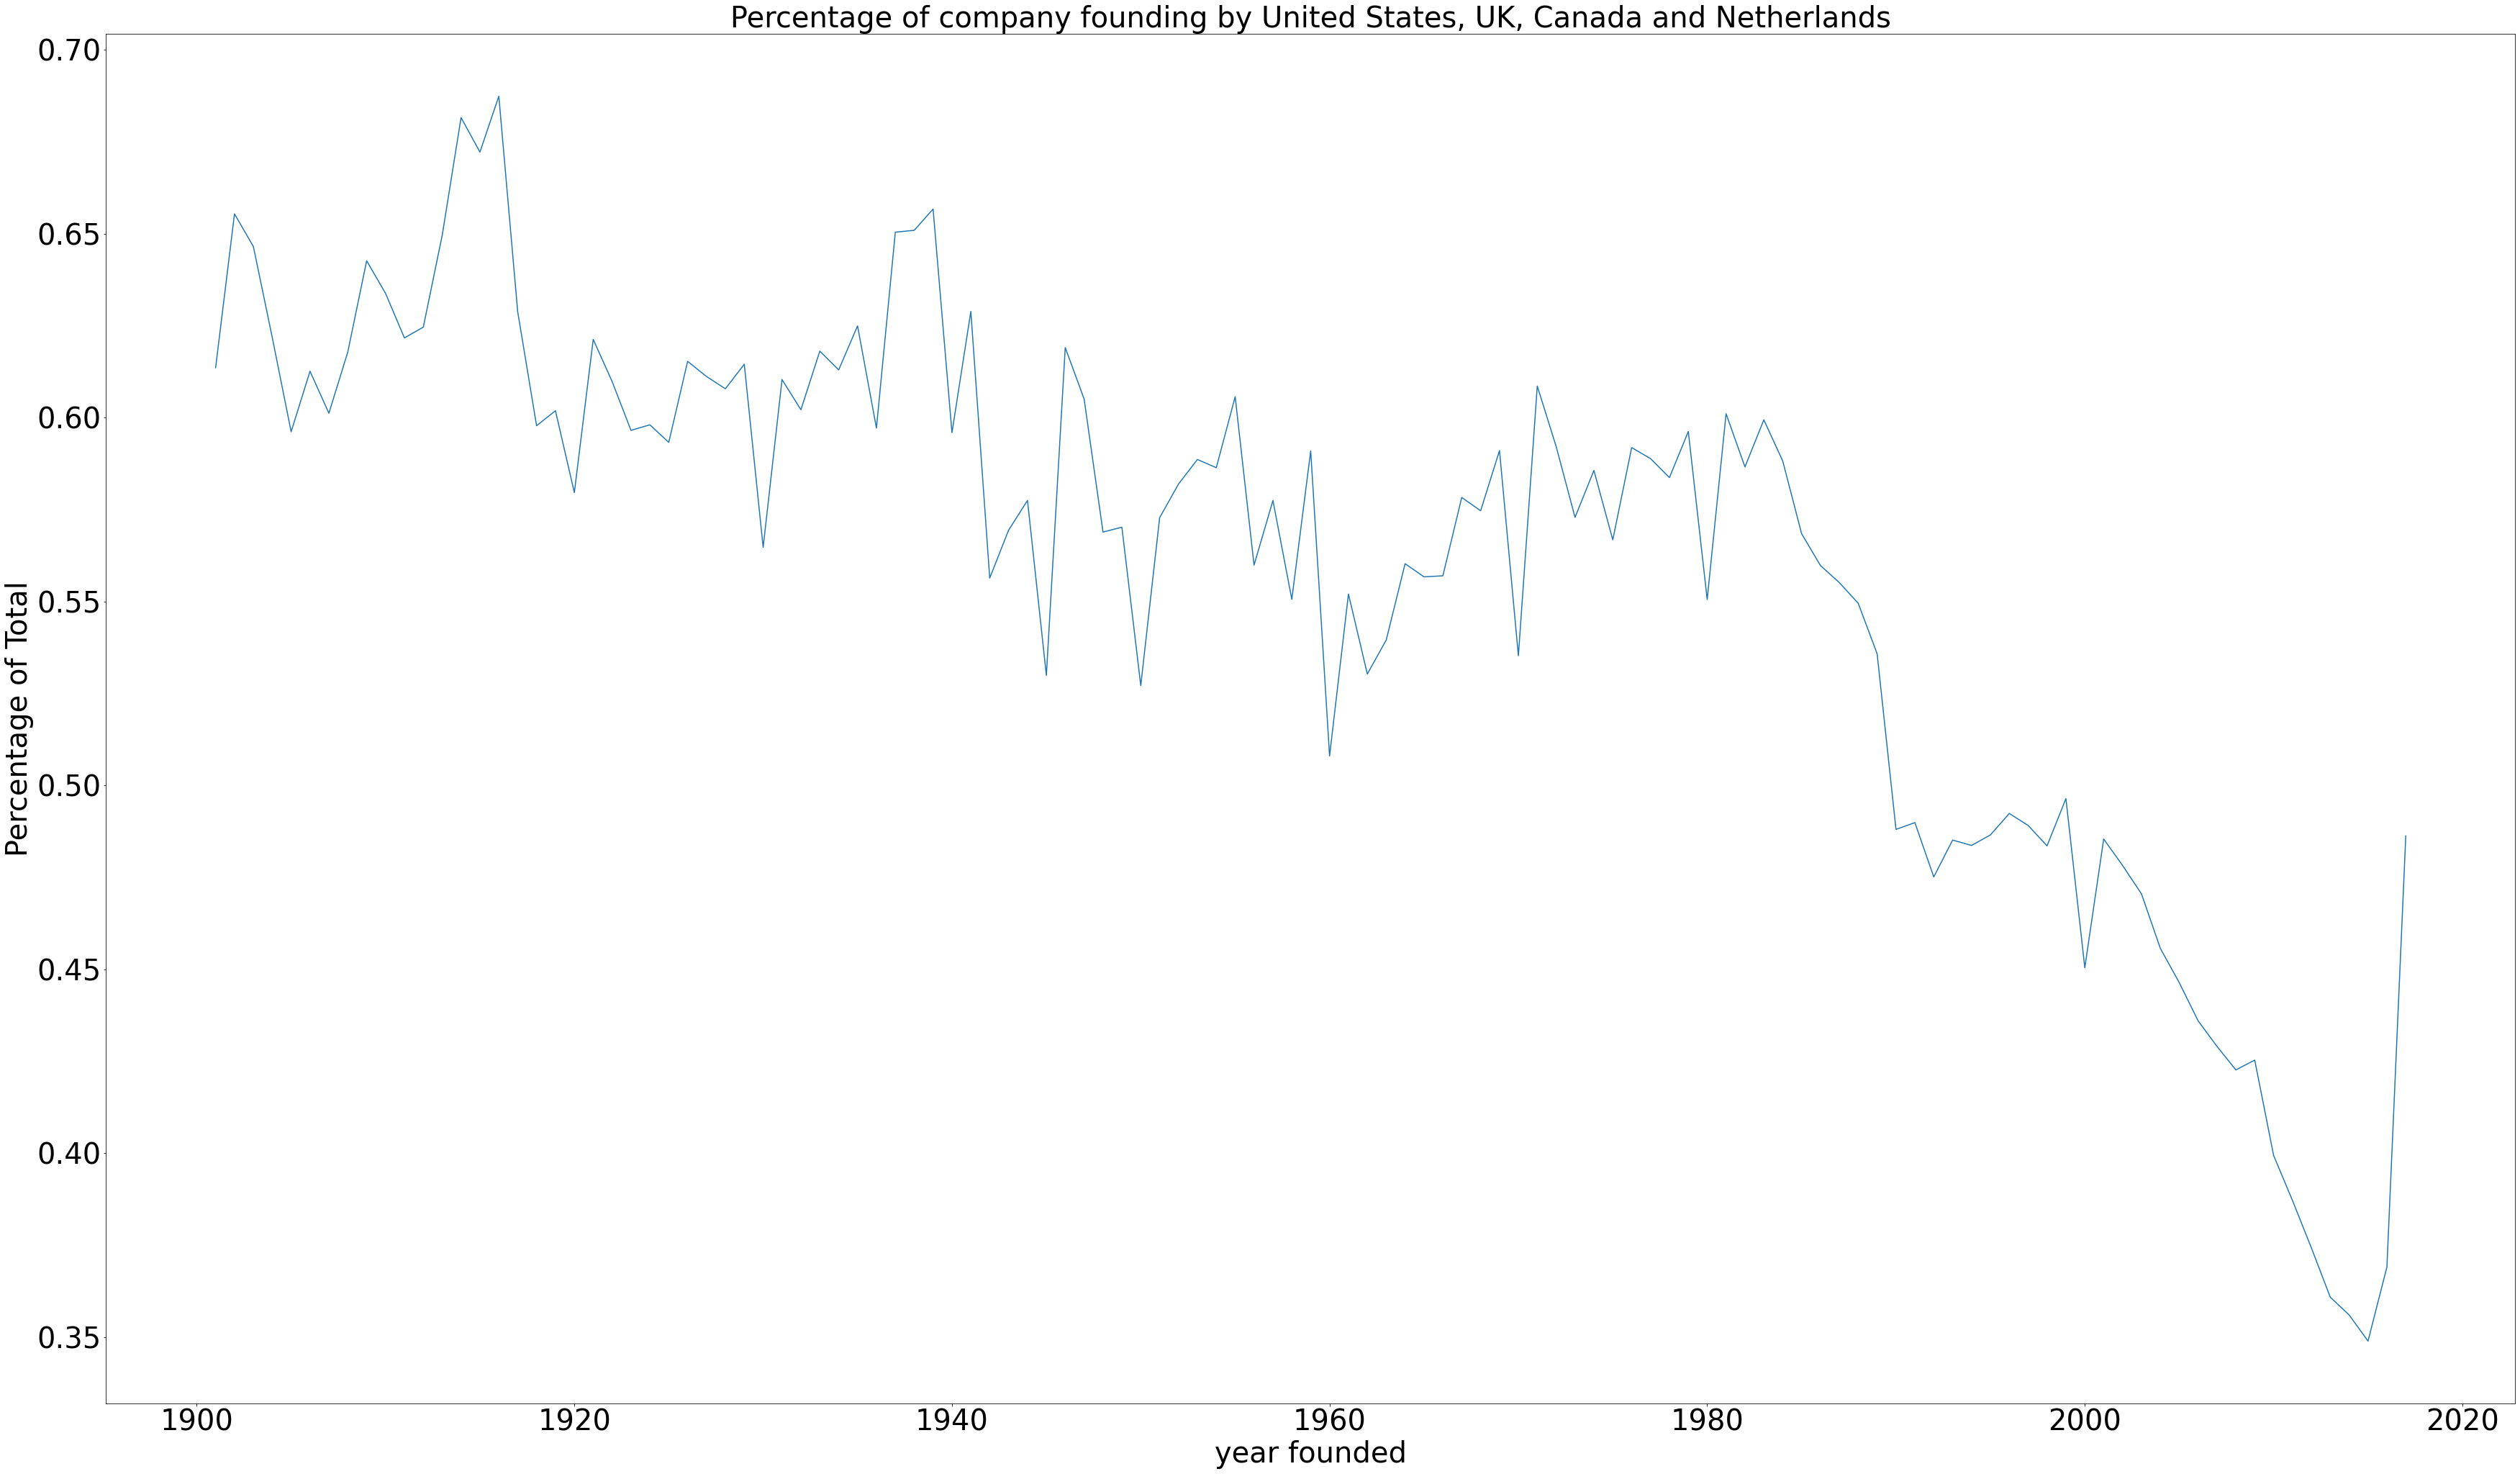

In [84]:
#percentage of top 4 companies over time
fig = plt.figure(figsize=(60,35)) 
plt.xlabel('Year Founded',fontsize=40)
plt.ylabel('Percentage of Total',fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Percentage of company founding by United States, UK, Canada and Netherlands',fontsize=40)

us = data_adj['country']=='united states'
uk = data_adj['country']=='united kingdom'
ca = data_adj['country']=='canada'
nl = data_adj['country']=='netherlands'
old_data_year = data_adj[uk|ca|nl|us].groupby('year founded').count()
_=(old_data_year['name']/yearly_companies['name']).plot()
plt.savefig('% of company founding by historical leaders.png')

In [41]:
data_p1960['industry'].value_counts().head(10)

construction                            8223
non-profit organization management      7184
insurance                               4440
mechanical or industrial engineering    4339
automotive                              4247
machinery                               4020
education management                    3963
hospital & health care                  3838
retail                                  3804
higher education                        3790
Name: industry, dtype: int64

In [42]:
data_1960['industry'].value_counts().head(10)

information technology and services    284777
marketing and advertising              219548
management consulting                  122454
internet                               118279
computer software                      114317
construction                            96244
financial services                      84881
real estate                             83011
health, wellness and fitness            73766
design                                  68621
Name: industry, dtype: int64

In [66]:
#most popular industries post 1960
(data_1960['industry'].value_counts()/len(data_1960['industry'])).head(15)

information technology and services    0.084195
marketing and advertising              0.064910
management consulting                  0.036204
internet                               0.034969
computer software                      0.033798
construction                           0.028455
financial services                     0.025095
real estate                            0.024542
health, wellness and fitness           0.021809
design                                 0.020288
education management                   0.016066
non-profit organization management     0.015994
retail                                 0.015308
professional training & coaching       0.014641
staffing and recruiting                0.014487
Name: industry, dtype: float64

In [67]:
#most popular industries pre 1960
(data_p1960['industry'].value_counts()/len(data_p1960['industry'])).head(15)

construction                            0.052302
non-profit organization management      0.045693
insurance                               0.028240
mechanical or industrial engineering    0.027598
automotive                              0.027013
machinery                               0.025569
education management                    0.025206
hospital & health care                  0.024411
retail                                  0.024195
higher education                        0.024106
banking                                 0.020124
building materials                      0.019189
real estate                             0.018935
government administration               0.018846
sports                                  0.018846
Name: industry, dtype: float64

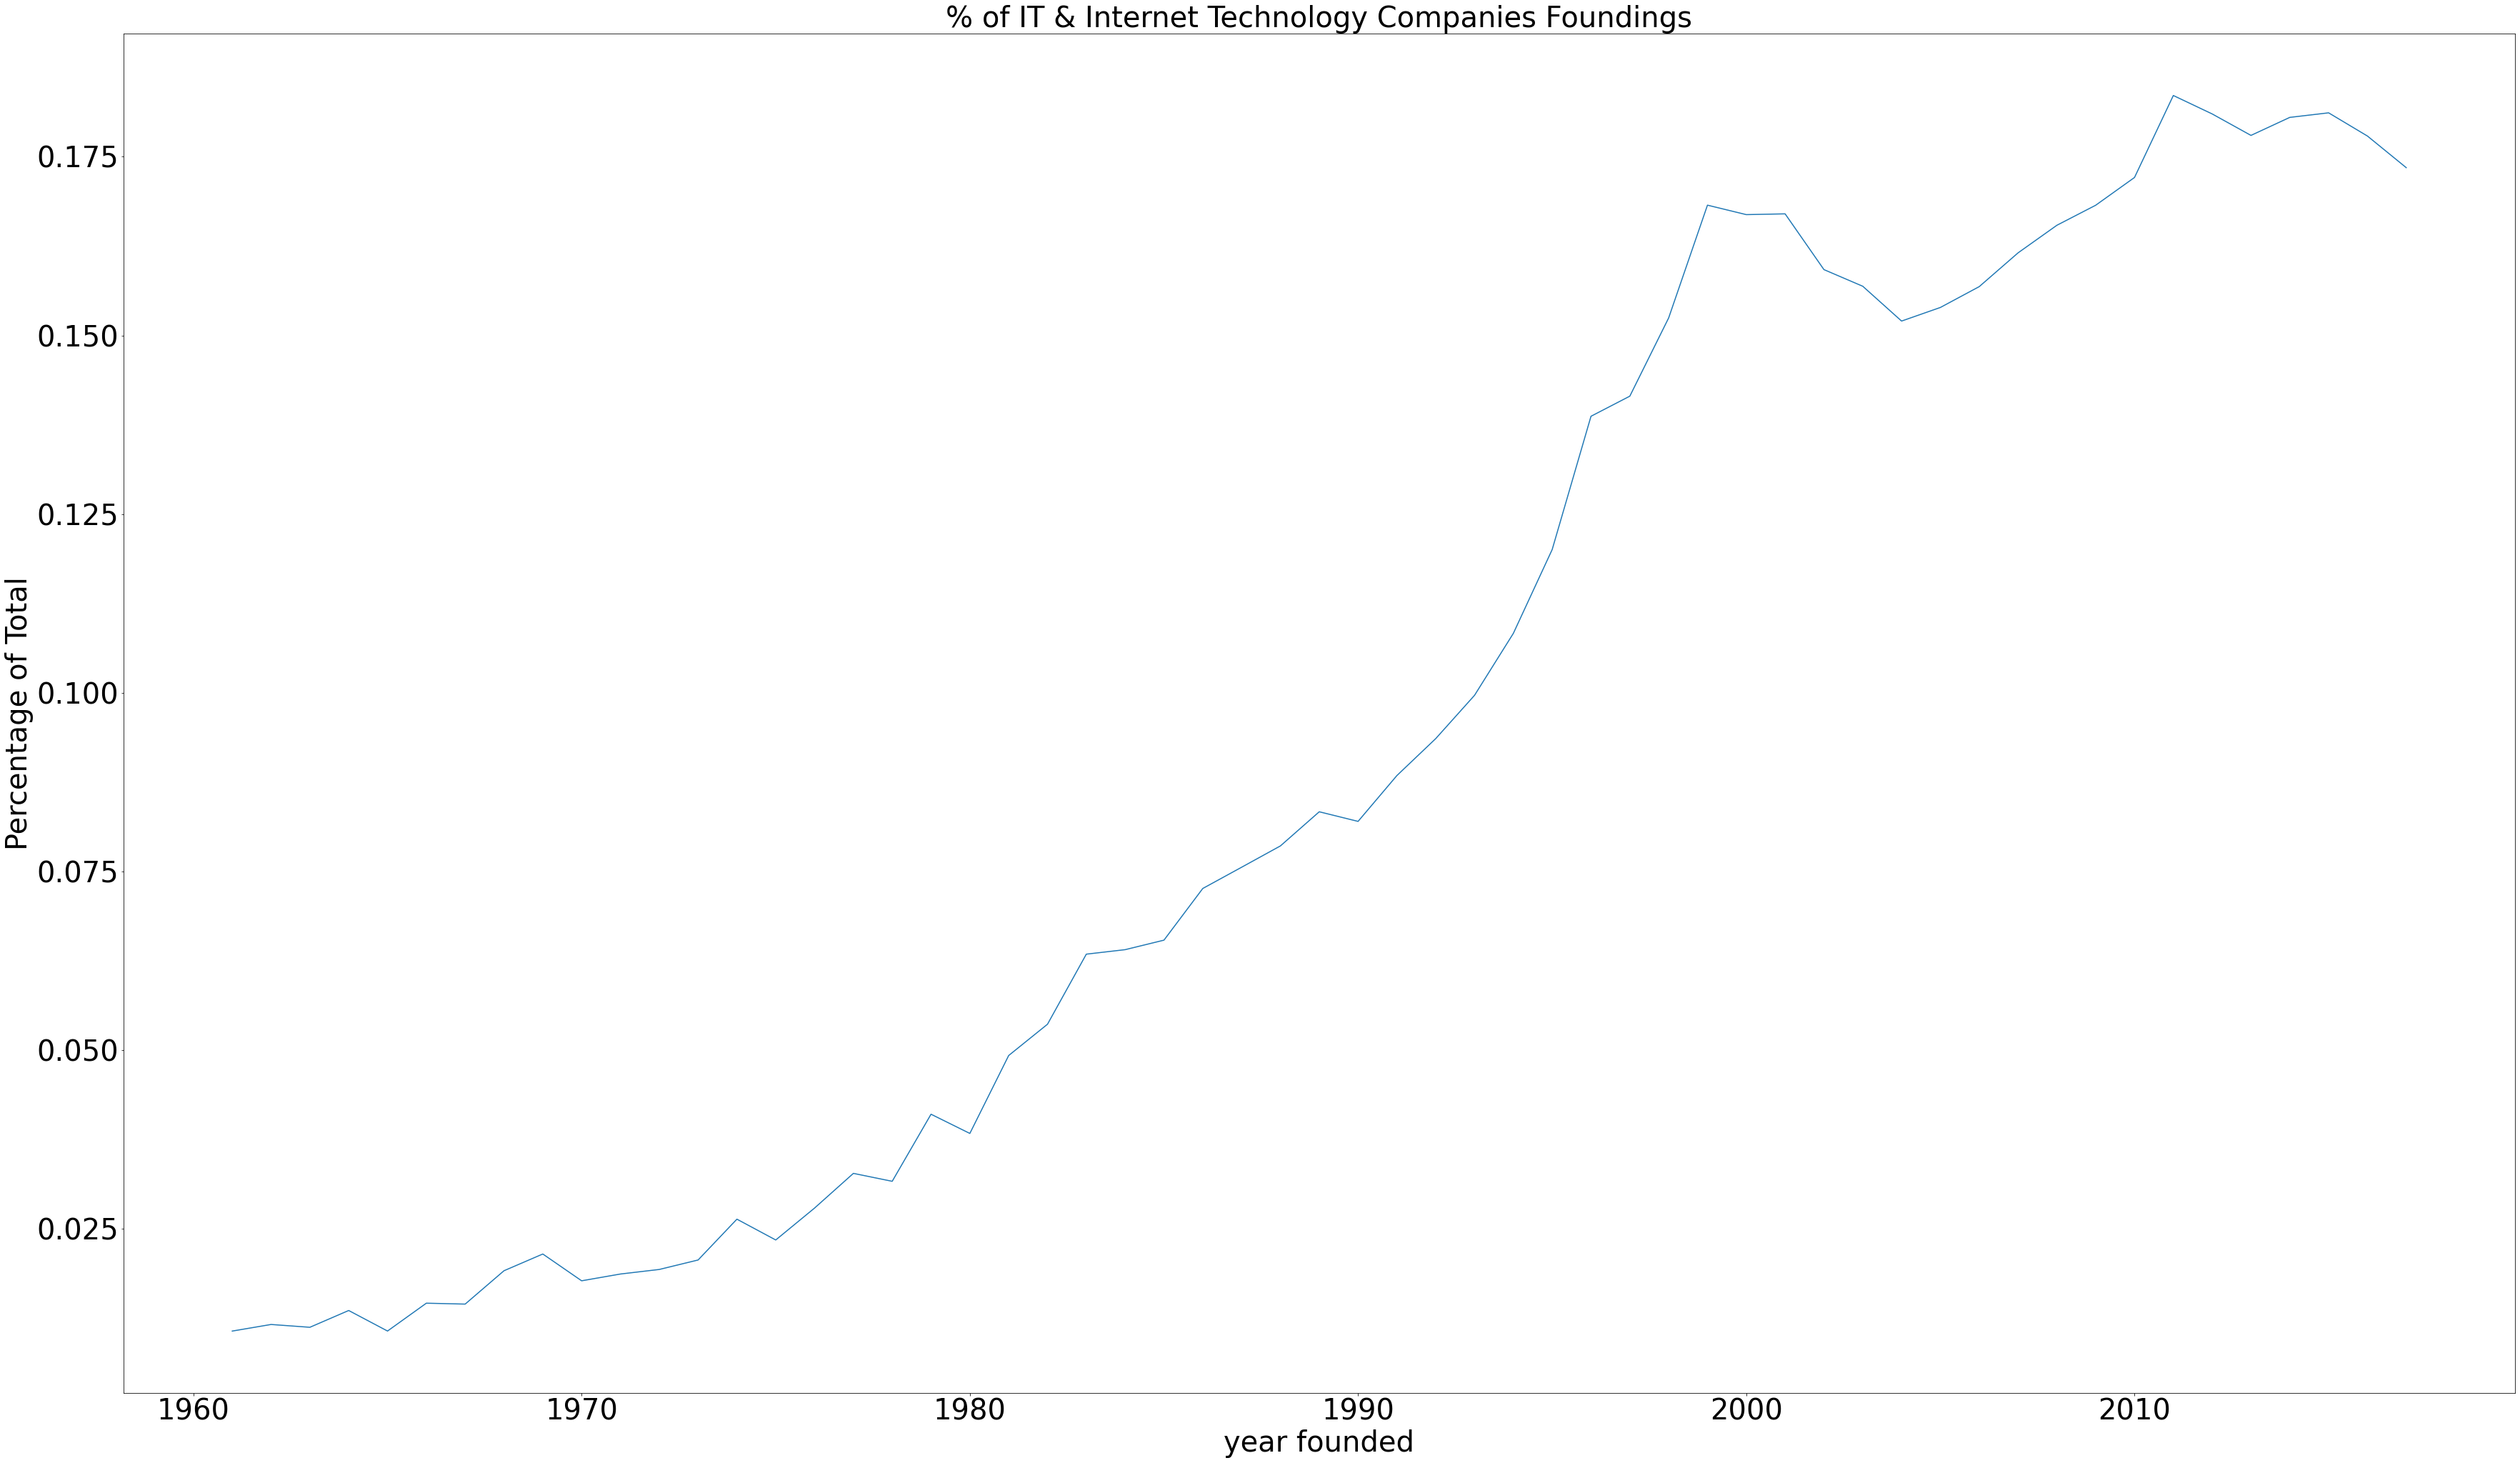

In [57]:
#clear rise of IT industry starting in the 70s through early 2000s
fig = plt.figure(figsize=(60,35)) 
plt.xlabel('Year Founded',fontsize=40)
plt.ylabel('Percentage of Total',fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('% of IT & Internet Technology Companies Foundings',fontsize=40)
it = data_1960['industry']=='information technology and services'
internet = data_1960['industry']=='internet'
computer = data_1960['industry']=='computer software'

it_data_year = data_1960[it | internet | computer].groupby('year founded').count()
_=(it_data_year['name']/yearly_companies['name']).plot()
plt.savefig('IT industry growth.png')

In [64]:
lower20 = data['year founded']>2000
data_2000 = data[lower20]

data_2000['country'].value_counts().head(20)

united states     709123
united kingdom    165947
canada             84717
india              81527
netherlands        79834
spain              61953
france             61141
brazil             58039
italy              47010
australia          46091
germany            29657
turkey             21818
sweden             20075
mexico             19722
belgium            19664
china              17842
denmark            16703
south africa       16702
switzerland        16405
argentina          13642
Name: country, dtype: int64

In [65]:
#find countries where % of founding is < specific treshold, track this over the 20th century to find meaningful measure of improvement

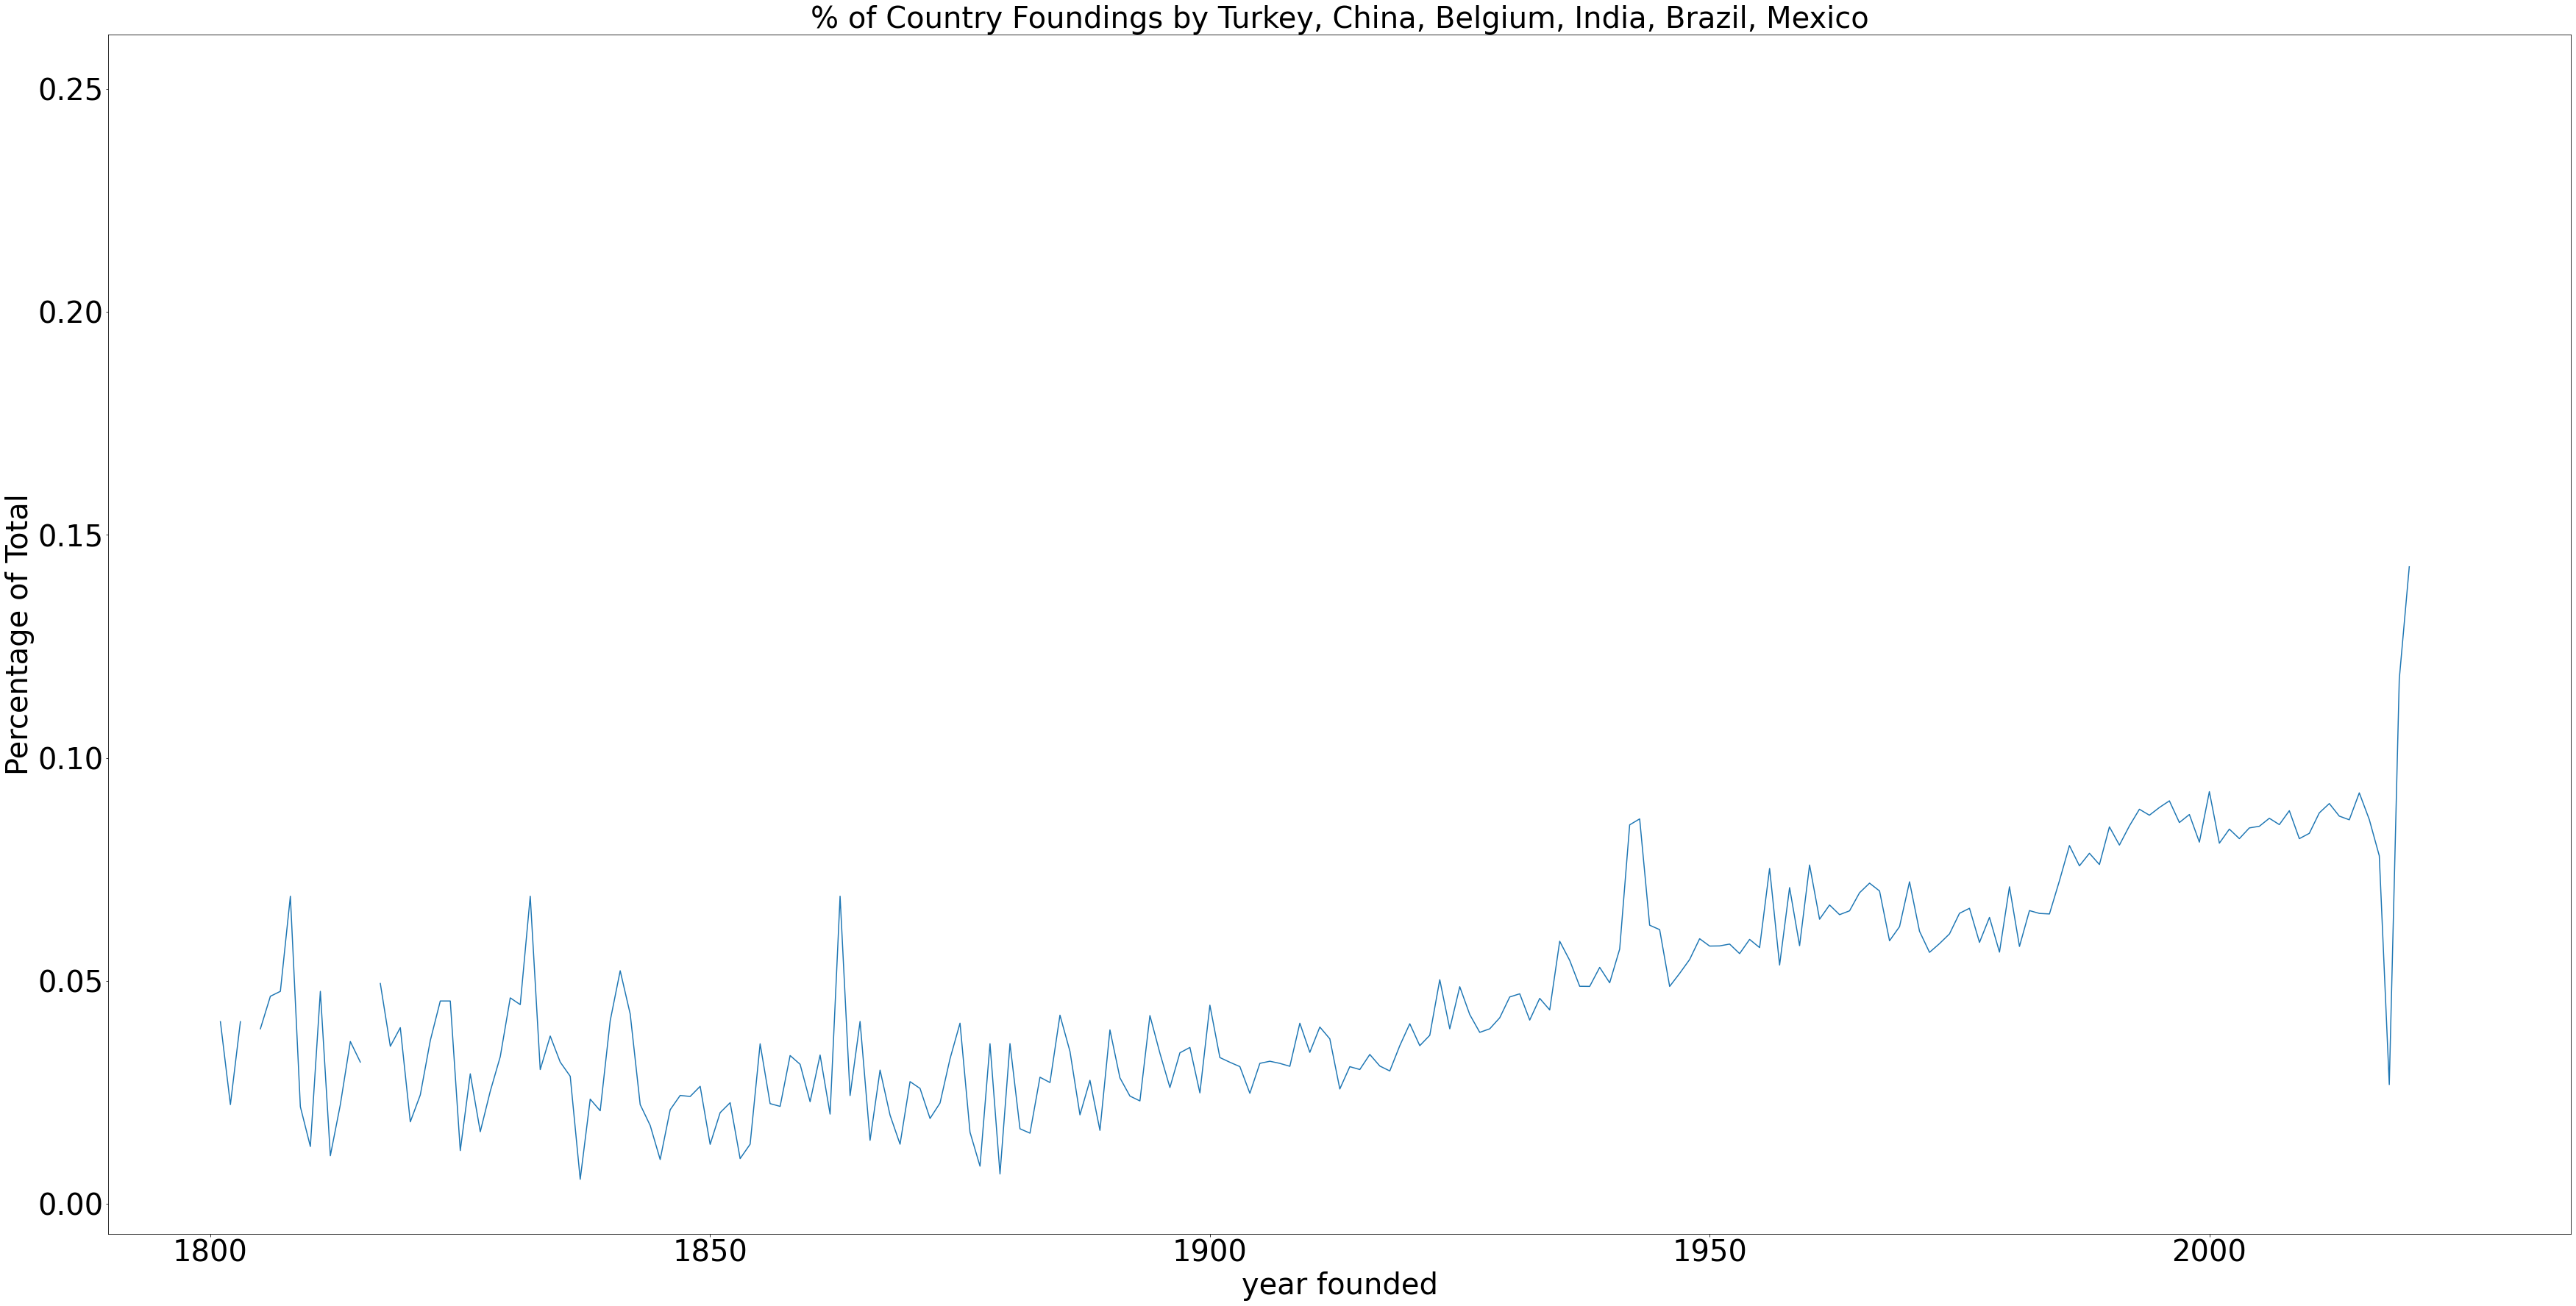

In [77]:
turkey = data['country']=='turkey'
china = data['country']=='china'
belgium = data['country']=='belgium'
india = data['country']=='india'
brazil = data['country']=='brazil'
spain = data['country']=='spain'
mexico = data['country']=='mexico'

yearly_companies = data.groupby('year founded').count()

fig = plt.figure(figsize=(60,30)) 
plt.xlabel('Year Founded',fontsize=40)
plt.ylabel('Percentage of Total',fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('% of Country Foundings by Turkey, China, Belgium, India, Brazil, Mexico',fontsize=40)

data_year_improve = data[turkey|china|belgium|india|brazil|mexico].groupby('year founded').count()
_=(data_year_improve['name']/yearly_companies['name']).plot()
plt.savefig('free trade winners.png')

In [110]:
industry_total_employee = pd.DataFrame(data_adj.groupby('industry')['total employee estimate'].agg('sum').sort_values())
industry_total_employee.tail(10)

,total employee estimate
industry,
internet,3189638
oil & energy,3526335
computer software,4095335
marketing and advertising,4237010
telecommunications,4276667
financial services,4691813
hospital & health care,4900400
higher education,4922179
retail,6450523


In [132]:
industry_count = pd.DataFrame(data_adj.groupby('industry')['name'].agg('count').sort_values())
industry_count.loc['banking']

name    9732
Name: banking, dtype: int64

In [115]:
industry = industry_total_employee.merge(industry_count,how='inner',left_on='industry',right_on='industry')

In [116]:
industry['econ_ratio']=industry['total employee estimate']/industry['name']

In [127]:
industry['econ_ratio'].sort_values(ascending=False).head(25)

industry
banking                      299.088060
tobacco                      285.735632
higher education             274.751828
government administration    262.242192
defense & space              245.189767
semiconductors               245.164848
supermarkets                 245.022044
military                     197.635303
railroad manufacture         145.197935
airlines/aviation            133.181748
outsourcing/offshoring       127.717653
pharmaceuticals              122.874370
retail                       117.363324
utilities                    115.983096
telecommunications           111.700238
international affairs        110.492861
package/freight delivery     107.841073
oil & energy                 106.346241
restaurants                  104.807635
hospital & health care       102.919309
aviation & aerospace          96.354414
gambling & casinos            95.903894
legislative office            80.289655
broadcast media               79.390078
dairy                         7

In [131]:
industry.loc['banking']

total employee estimate    2.910725e+06
name                       9.732000e+03
econ_ratio                 2.990881e+02
Name: banking, dtype: float64

In [133]:
productive_industry = ['banking','tobacco','higher education','government administration','defense & space','semiconductors']

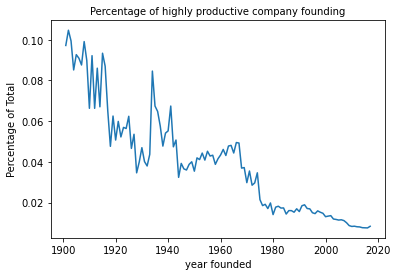

In [154]:
bank = data_adj['industry'] == 'banking'
tobacco = data_adj['industry'] == 'tobacco'
higher_ed = data_adj['industry'] == 'higher education'
gov_admin = data_adj['industry'] == 'government administration'
def_space = data_adj['industry'] == 'defense & space'
semi = data_adj['industry'] == 'semiconductors'
superm = data_adj['industry'] == 'supermarkets'


plt.xlabel('Year Founded',fontsize=10)
plt.ylabel('Percentage of Total',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Percentage of highly productive company founding',fontsize=10)

data_year_improve = data_adj[bank|tobacco|higher_ed|gov_admin|def_space|semi|superm].groupby('year founded').count()
_=(data_year_improve['name']/yearly_companies['name']).plot()
plt.savefig('productive industries.png')